## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
# dropout, regularizers, batchnormalization
from keras.regularizers import l2
from keras.layers import Dropout
from keras.layers import BatchNormalization
def build_mlp_all(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(1e-4))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(1e-4))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.1)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_mlp_bn(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_mlp_dp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        x = Dropout(0.1)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_mlp_rg(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(1e-4))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(1e-4))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_mlp_bndp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.1)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def build_mlp_inbn(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        x = keras.layers.Dense(units=n_units, 
                               activation="relu", 
                               name="hidden_layer"+str(i+1))(x)
        x = BatchNormalization()(x)
        x = Dropout(0.1)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 16
MOMENTUM = 0.95

In [7]:
results = {}
# build_mlp_all
model = build_mlp_all(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]
exp_name_tag = "exp-normalize-all"
results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

# build_mlp_bn
model = build_mlp_bn(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]
exp_name_tag = "exp-normalize-bn"
results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

# build_mlp_dp
model = build_mlp_dp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]
exp_name_tag = "exp-normalize-dp"
results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

# build_mlp_rg
model = build_mlp_rg(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]
exp_name_tag = "exp-normalize-rg"
results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

# build_mlp_bndp
model = build_mlp_bndp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]
exp_name_tag = "exp-normalize-bndp"
results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

# build_mlp_inbn
model = build_mlp_inbn(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]
exp_name_tag = "exp-normalize-inbn"
results[exp_name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2

Epoch 40/50
50000/50000 [==============================] - 15s 300us/step - loss: 1.5408 - acc: 0.4884 - val_loss: 1.5057 - val_acc: 0.4987
Epoch 41/50
50000/50000 [==============================] - 15s 299us/step - loss: 1.5556 - acc: 0.4798 - val_loss: 1.5310 - val_acc: 0.4934
Epoch 42/50
50000/50000 [==============================] - 15s 299us/step - loss: 1.5746 - acc: 0.4710 - val_loss: 1.5235 - val_acc: 0.4995
Epoch 43/50
50000/50000 [==============================] - 15s 299us/step - loss: 1.5359 - acc: 0.4873 - val_loss: 1.5401 - val_acc: 0.4794
Epoch 44/50
50000/50000 [==============================] - 15s 300us/step - loss: 1.5274 - acc: 0.4910 - val_loss: 1.4686 - val_acc: 0.5110
Epoch 45/50
50000/50000 [==============================] - 15s 299us/step - loss: 1.5183 - acc: 0.4954 - val_loss: 1.4724 - val_acc: 0.5100
Epoch 46/50
50000/50000 [==============================] - 15s 299us/step - loss: 1.5154 - acc: 0.4955 - val_loss: 1.4918 - val_acc: 0.5012
Epoch 47/50
50000/50

50000/50000 [==============================] - 14s 284us/step - loss: 1.1489 - acc: 0.5924 - val_loss: 1.3425 - val_acc: 0.5370
Epoch 39/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.1464 - acc: 0.5932 - val_loss: 1.3115 - val_acc: 0.5425
Epoch 40/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.1433 - acc: 0.5960 - val_loss: 1.3369 - val_acc: 0.5293
Epoch 41/50
50000/50000 [==============================] - 14s 284us/step - loss: 1.1344 - acc: 0.5978 - val_loss: 1.3681 - val_acc: 0.5218
Epoch 42/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.1349 - acc: 0.5994 - val_loss: 1.4028 - val_acc: 0.5194
Epoch 43/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.1419 - acc: 0.5940 - val_loss: 1.3845 - val_acc: 0.5142
Epoch 44/50
50000/50000 [==============================] - 14s 283us/step - loss: 1.1349 - acc: 0.5994 - val_loss: 1.3451 - val_acc: 0.5339
Epoch 45/50
50000/50000 [=======

50000/50000 [==============================] - 9s 175us/step - loss: 1.0573 - acc: 0.6175 - val_loss: 1.3089 - val_acc: 0.5389
Epoch 37/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.0520 - acc: 0.6220 - val_loss: 1.3314 - val_acc: 0.5363
Epoch 38/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.0362 - acc: 0.6265 - val_loss: 1.3099 - val_acc: 0.5429
Epoch 39/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.0313 - acc: 0.6283 - val_loss: 1.3065 - val_acc: 0.5494
Epoch 40/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.0206 - acc: 0.6288 - val_loss: 1.3183 - val_acc: 0.5461
Epoch 41/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.0124 - acc: 0.6329 - val_loss: 1.3149 - val_acc: 0.5480
Epoch 42/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.0065 - acc: 0.6339 - val_loss: 1.3075 - val_acc: 0.5409
Epoch 43/50
50000/50000 [==============

50000/50000 [==============================] - 8s 167us/step - loss: 0.9412 - acc: 0.7303 - val_loss: 1.7309 - val_acc: 0.5389
Epoch 38/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.9239 - acc: 0.7374 - val_loss: 1.7820 - val_acc: 0.5218
Epoch 39/50
50000/50000 [==============================] - 8s 169us/step - loss: 0.9207 - acc: 0.7380 - val_loss: 1.7294 - val_acc: 0.5446
Epoch 40/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.9088 - acc: 0.7454 - val_loss: 1.7433 - val_acc: 0.5351
Epoch 41/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.9018 - acc: 0.7476 - val_loss: 1.8056 - val_acc: 0.5294
Epoch 42/50
50000/50000 [==============================] - 8s 168us/step - loss: 0.8898 - acc: 0.7535 - val_loss: 1.8811 - val_acc: 0.5254
Epoch 43/50
50000/50000 [==============================] - 8s 170us/step - loss: 0.8801 - acc: 0.7579 - val_loss: 1.8460 - val_acc: 0.5255
Epoch 44/50
50000/50000 [==============

50000/50000 [==============================] - 15s 307us/step - loss: 1.4460 - acc: 0.4868 - val_loss: 1.3865 - val_acc: 0.5068
Epoch 33/50
50000/50000 [==============================] - 15s 304us/step - loss: 1.4578 - acc: 0.4834 - val_loss: 1.3846 - val_acc: 0.5109
Epoch 34/50
50000/50000 [==============================] - 15s 307us/step - loss: 1.4412 - acc: 0.4882 - val_loss: 1.4245 - val_acc: 0.4942
Epoch 35/50
50000/50000 [==============================] - 15s 304us/step - loss: 1.4272 - acc: 0.4949 - val_loss: 1.3781 - val_acc: 0.5119
Epoch 36/50
50000/50000 [==============================] - 15s 301us/step - loss: 1.4184 - acc: 0.4972 - val_loss: 1.3698 - val_acc: 0.5139
Epoch 37/50
50000/50000 [==============================] - 15s 308us/step - loss: 1.4167 - acc: 0.4970 - val_loss: 1.4069 - val_acc: 0.4960
Epoch 38/50
50000/50000 [==============================] - 15s 303us/step - loss: 1.4126 - acc: 0.4994 - val_loss: 1.3616 - val_acc: 0.5106
Epoch 39/50
50000/50000 [=======

50000/50000 [==============================] - 17s 336us/step - loss: 1.0831 - acc: 0.6166 - val_loss: 1.2218 - val_acc: 0.5692
Epoch 27/50
50000/50000 [==============================] - 17s 334us/step - loss: 1.0719 - acc: 0.6208 - val_loss: 1.2200 - val_acc: 0.5675
Epoch 28/50
50000/50000 [==============================] - 17s 339us/step - loss: 1.0631 - acc: 0.6263 - val_loss: 1.2217 - val_acc: 0.5674
Epoch 29/50
50000/50000 [==============================] - 17s 334us/step - loss: 1.0476 - acc: 0.6247 - val_loss: 1.2127 - val_acc: 0.5703
Epoch 30/50
50000/50000 [==============================] - 17s 337us/step - loss: 1.0385 - acc: 0.6335 - val_loss: 1.2254 - val_acc: 0.5640
Epoch 31/50
50000/50000 [==============================] - 17s 337us/step - loss: 1.0276 - acc: 0.6392 - val_loss: 1.2237 - val_acc: 0.5687
Epoch 32/50
50000/50000 [==============================] - 17s 332us/step - loss: 1.0144 - acc: 0.6377 - val_loss: 1.2355 - val_acc: 0.5680
Epoch 33/50
50000/50000 [=======

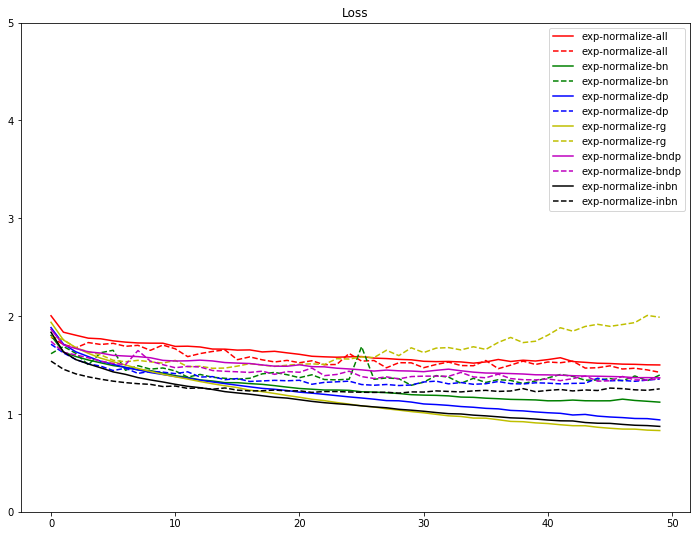

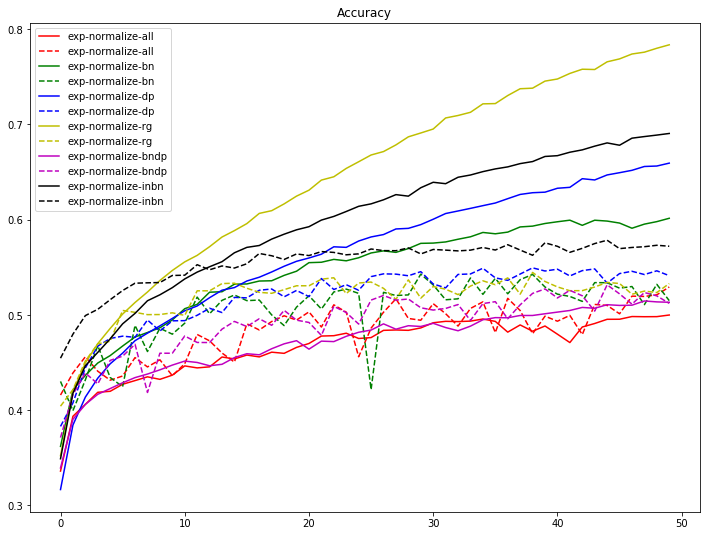

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(12, 9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()